In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1) Зниження розмірності та візуалізація даних 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv("cybersecurity_attacks.csv")  # https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/

df.keys()

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [4]:
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'Nothing Detected' if pd.isna(x) else x)
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'Yes' if x == 'Alert Triggered' else 'No')
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'Without Proxy' if pd.isna(x) else x)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'Not Logged' if pd.isna(x) else x)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'Not Alerted' if pd.isna(x) else x)

related_features = ['IDS/IPS Alerts', 'Protocol', 'Traffic Type', 'Malware Indicators', 'Packet Length',
                    'Anomaly Scores', 'Severity Level', 'Action Taken', 'Attack Type', 'Payload Data']

categorical_columns = ['Protocol', 'Traffic Type', 'Malware Indicators',
                       'Severity Level', 'Action Taken', 'Attack Type']

df_encoded = pd.get_dummies(df[related_features], columns=categorical_columns)

df_encoded['IDS/IPS Alerts'] = df_encoded['IDS/IPS Alerts'].apply(lambda x: 1 if x == 'Alert Data' else 0)
df_encoded['Payload Data'] = df_encoded['Payload Data'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

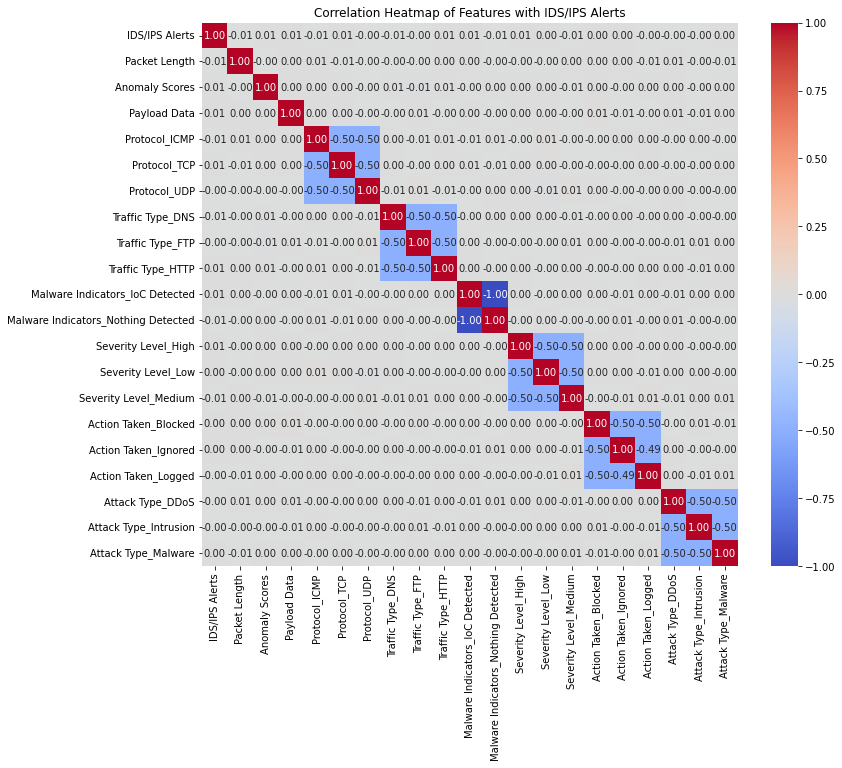

In [5]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Features with IDS/IPS Alerts')
plt.show()

### <u>Principal component analysis</u>

In [6]:
# X = df_encoded[['Severity Level_Low', 'Severity Level_Medium', 'Severity Level_High']]
# y = df_encoded['IDS/IPS Alerts']

In [7]:
df_encoded.sample(5)

,IDS/IPS Alerts,Packet Length,Anomaly Scores,Payload Data,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,...,Malware Indicators_Nothing Detected,Severity Level_High,Severity Level_Low,Severity Level_Medium,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware
37360,0,258,22.71,22,1,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
5841,0,389,5.48,18,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2811,0,475,9.27,4,0,1,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
38580,0,901,92.49,21,0,0,1,1,0,0,...,1,0,0,1,0,0,1,1,0,0
8478,0,479,80.41,21,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1


In [8]:
features = df_encoded.drop(columns='IDS/IPS Alerts').iloc[:, :-1]
df_encoded[features.columns] = StandardScaler().fit_transform(features)

X = df_encoded[['Anomaly Scores', 'Payload Data', 'Packet Length']]
y = df_encoded['IDS/IPS Alerts']

In [9]:
df_encoded.sample(5)

,IDS/IPS Alerts,Packet Length,Anomaly Scores,Payload Data,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,...,Malware Indicators_Nothing Detected,Severity Level_High,Severity Level_Low,Severity Level_Medium,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware
16556,1,-1.431243,0.299673,0.038271,-0.710915,1.419107,-0.705742,-0.708805,-0.704351,1.412095,...,-1.0,1.410351,-0.701136,-0.711154,-0.714904,1.418787,-0.701612,1.406716,-0.704391,0
7380,1,0.489250,1.491567,-0.756669,1.406637,-0.704669,-0.705742,1.410826,-0.704351,-0.708168,...,-1.0,1.410351,-0.701136,-0.711154,1.398789,-0.704828,-0.701612,-0.710875,1.419667,0
27046,1,-1.457682,0.241447,0.634477,-0.710915,-0.704669,1.416949,-0.708805,1.419747,-0.708168,...,1.0,-0.709043,-0.701136,1.406164,1.398789,-0.704828,-0.701612,-0.710875,1.419667,0
6887,1,0.508479,-1.084227,-1.154139,-0.710915,-0.704669,1.416949,-0.708805,-0.704351,1.412095,...,-1.0,1.410351,-0.701136,-0.711154,-0.714904,1.418787,-0.701612,-0.710875,-0.704391,1
34607,0,0.989204,0.109399,0.038271,-0.710915,1.419107,-0.705742,-0.708805,-0.704351,1.412095,...,-1.0,1.410351,-0.701136,-0.711154,-0.714904,1.418787,-0.701612,-0.710875,1.419667,0


In [10]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [11]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

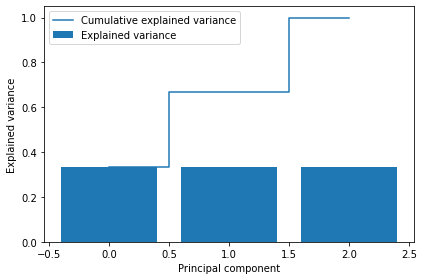

In [12]:
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### ► PCA

,PCA_1,PCA_2,Alert
13966,-0.014683,-0.222034,1
17234,-0.474116,-0.610658,0
221,0.176946,0.276693,1
33154,-0.479028,-0.003430,1
24568,-0.404171,-0.073707,1


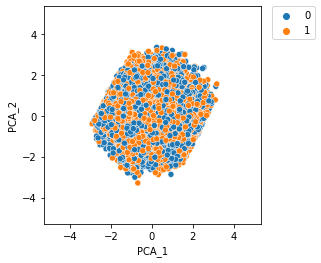

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'PCA_1': pca_result[:, 0], 'PCA_2': pca_result[:, 1], 'Alert': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Alert', data=pca_result_df, ax=ax)
lim = (pca_result.min() - 2, pca_result.max() + 2)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

pca_result_df.sample(5)

### ► tSNE

,tsne_1,tsne_2,Alert
31768,-37.495186,12.571146,1
12813,-11.537433,22.745871,1
1733,-4.538185,-51.533474,1
1903,-16.424507,30.736664,0
9887,-24.227371,34.123314,0


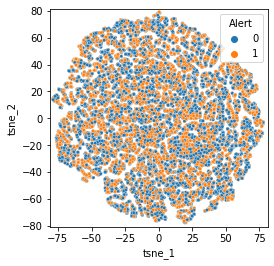

In [14]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'Alert': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Alert', data=tsne_result_df, ax=ax, s=10)
lim = (tsne_result.min() - 2, tsne_result.max() + 2)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

tsne_result_df.sample(5)

<hr>

## 2) Квантизація зображень через кластерний аналіз

In [15]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io
from skimage.transform import resize

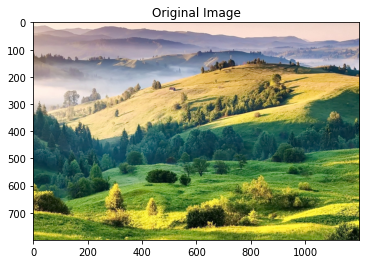

In [16]:
# Перетворити на числа з плаваючою точкою замість стандартного 8-бітного цілого кодування
image_photo = io.imread('./polonyna.jpg')
image_array = np.array(image_photo, dtype=np.float64) / 255

# Відображення оригінального зображення
plt.imshow(image_photo)
plt.title("Original Image")
plt.show()

In [17]:
# Список кількостей кольорів для квантування
n_colors = [64, 32, 16, 8, 4, 2]

# Перетворення зображення у двовимірний масив для квантування
w, h, d = image_array.shape
image_data = np.reshape(image_array, (w * h, d))

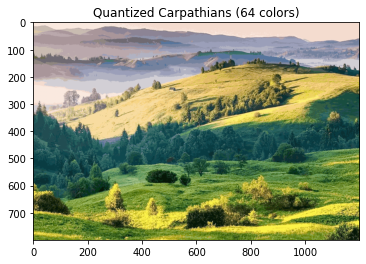

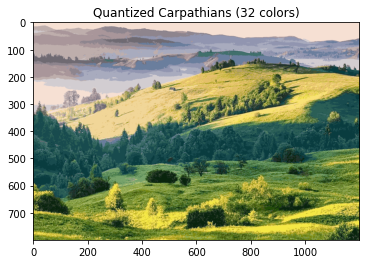

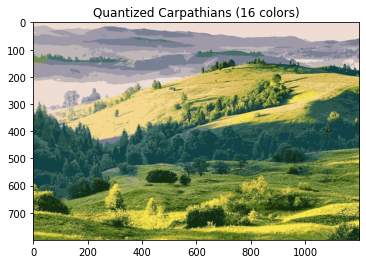

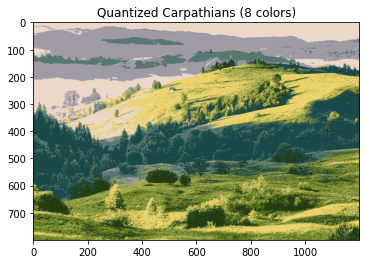

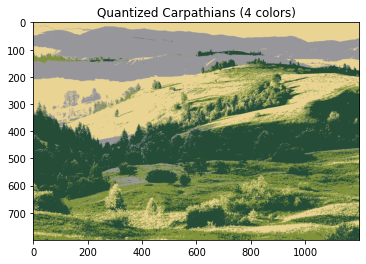

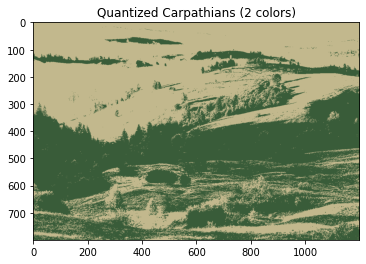

In [18]:
for i in range(len(n_colors)):
    # Навчання моделі K-means на підмножині пікселів
    image_data_sample = shuffle(image_data, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors[i], random_state=0).fit(image_data_sample)

    # Прогнозування кольорів для всіх точок у повному зображенні
    label = kmeans.predict(image_data)
    
    plt.figure()
    plt.title(f"Quantized Carpathians ({n_colors[i]} colors)")
    plt.imshow(kmeans.cluster_centers_[label].reshape(w, h, -1))

<hr>

## 3) Обробка та класифікація текстових даних 

### 1. Text cleaning with RegEx

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [20]:
df_spam = pd.read_csv('./ideation_dataset.csv')  # https://www.kaggle.com/datasets/aunanya875/suicidal-tweet-detection-dataset
df_spam.dropna(inplace = True)

df_spam.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [21]:
df_spam.shape

(1785, 2)

In [22]:
df_spam = df_spam.rename(columns={'Suicide': 'label'})
df_spam = df_spam.rename(columns={'Tweet': 'text'})

df_spam['label'] = LabelEncoder().fit_transform(df_spam['label'])

In [23]:
from collections import Counter
Counter(df_spam['label'])

Counter({0: 1126, 1: 659})

In [24]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("&quot", " ", text)
    text = re.sub("&\S+", " ", text)
    text = re.sub("â\S+", " ", text)
    text = re.sub("ð\S+", " ", text)
    text = re.sub("–", " ", text)
    text = re.sub("rt", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}', ' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stopwords.words("english")])
    return text

df_spam['text'] = df_spam['text'].apply(clean_text)

df_spam.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\t-1000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,making lunch,0
1,want money,0
2,crap took forever put together going go sleep...,1
3,hey jer since sta twittering,0
4,trying delicious library mixed results bar cod...,0


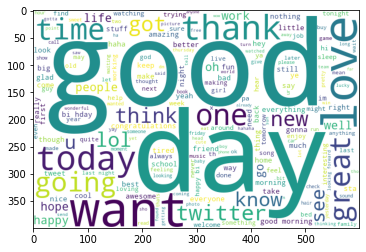

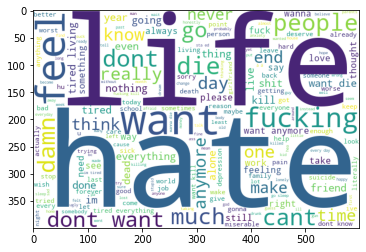

In [25]:
def visualize(label):
    text = ''
    for msg in df_spam[df_spam['label'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.show()

visualize(0)
visualize(1)

### 2. Text сlassification with SK-learn

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
X = df_spam['text']
y = df_spam['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
cv = CountVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_transformed = cv.fit_transform(X_train)
X_test_transformed = cv.transform(X_test)

* **k-Nearest Neighbor**

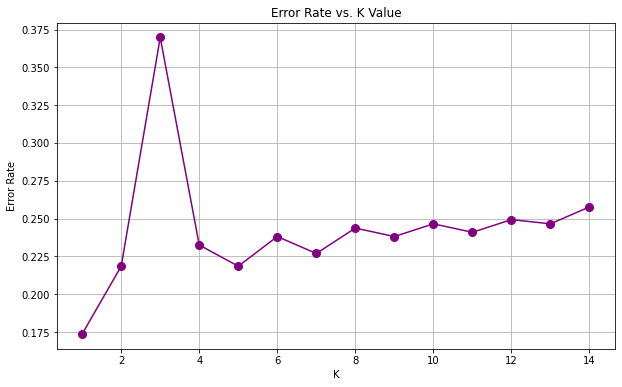

In [29]:
error_rate = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_transformed,y_train)
    pred_i = knn.predict(X_test_transformed)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), error_rate, marker='o', markersize=8, color='purple')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [30]:
knn = KNeighborsClassifier(n_neighbors=2)
params_knn = {'n_neighbors': range(1, 15)}

grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5)
grid_knn.fit(X_train_transformed, y_train)
y_pred_knn = grid_knn.predict(X_test_transformed)

report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("kNN Classification Report:\n", report)
print("kNN Confusion Matrix:\n", conf_matrix)

kNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       231
           1       0.97      0.52      0.68       126

    accuracy                           0.83       357
   macro avg       0.88      0.76      0.78       357
weighted avg       0.86      0.83      0.81       357

kNN Confusion Matrix:
 [[229   2]
 [ 60  66]]


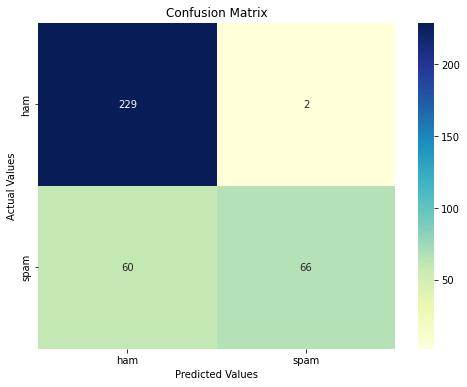

In [31]:
class_names=['ham', 'spam'] 
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

plt.show()

* **AdaBoost**

In [32]:
ada = AdaBoostClassifier()
ada.fit(X_train_transformed, y_train)
y_pred_ada = ada.predict(X_test_transformed)

report = classification_report(y_test, y_pred_ada)
conf_matrix = confusion_matrix(y_test, y_pred_ada)
print("AdaBoost Classification Report:\n", report)
print("AdaBoost Confusion Matrix:\n", conf_matrix)

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       231
           1       0.89      0.71      0.79       126

    accuracy                           0.87       357
   macro avg       0.87      0.83      0.84       357
weighted avg       0.87      0.87      0.86       357

AdaBoost Confusion Matrix:
 [[220  11]
 [ 37  89]]


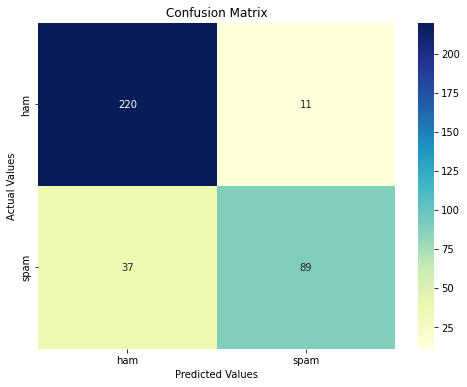

In [33]:
class_names=['ham', 'spam']
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

plt.show()